# ニューラルネットワークの順伝播

ニューラルネットワークの順伝播の例として，手書き数字の訓練データを正しく認識できることを確かめる．重み（パラメータ）はすでに学習されたものを用いる．

In [14]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec

In [15]:
# 訓練データのロード
data = scipy.io.loadmat('data/ex3data1.mat')
# X: 各ピクセルの画素値（特徴量）からなる行ベクトルを全画像について縦に並べた行列
# yl: 正解の数字（ターゲット）を全画像について縦に並べた列ベクトル
X, yl = data['X'], data['y']
yl[yl==10] = 0 # 0の画像のラベルが10に書き換えられているため0に戻す
m, n = X.shape
print('訓練データの数（画像の枚数）：m =',m)
print('特徴量の数（ピクセル数）：n =',n)

訓練データの数（画像の枚数）：m = 5000
特徴量の数（ピクセル数）：n = 400


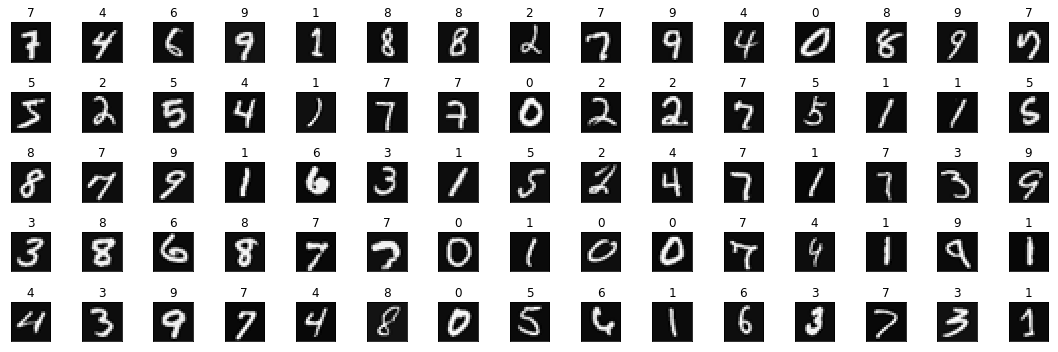

In [19]:
# いくつかの訓練データに対する手書き数字画像と正解数字
n_im_row, n_im_col = 5, 15
n_im = n_im_row * n_im_col
d = np.random.choice(np.arange(m),n_im,replace=False)

n_px_row = np.floor(np.sqrt(n)).astype('int')
n_px_col = (n / n_px_row).astype('int')

fig = plt.figure(figsize=(n_im_col,n_im_row))
gs = gridspec.GridSpec(n_im_row,n_im_col)
k = 0
for i in np.arange(n_im_row):
    for j in np.arange(n_im_col):
        ax = plt.subplot(gs[i,j])
        ax.imshow(X[d[k],:].reshape(n_px_row,n_px_col,order='F'),cmap='gray')
        ax.set_title(str(yl[d[k],-1]))
        ax.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
        ax.tick_params(bottom=False,left=False,right=False,top=False)
        k = k + 1

plt.tight_layout()
plt.show()

In [20]:
# 0番目の特徴量1から成る列を追加する関数
def insert1column(A_unext):
    A = np.insert(A_unext,0,1,axis=1)
    return(A)

In [21]:
# アフィン変換
def affine(A_unext,Theta):
    A = insert1column(A_unext)
    Z = A @ Theta
    return(Z)

In [22]:
# シグモイド関数
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return(s)

In [23]:
# 順伝播
def forward(X,Theta,activfun):
    Theta0 = Theta[0]
    Theta1 = Theta[1]
    Z1 = affine(X,Theta0)
    A1 = activfun(Z1)
    Z2 = affine(A1,Theta1)
    A2 = activfun(Z2)
    return(A2)

In [24]:
# 予測
def predict(X,Theta,activfun):
    h = forward(X,Theta,activfun)
    ypl = np.argmax(h,axis=1).reshape(-1,1)
    return(ypl)

In [25]:
# 予測と正解率
def predict_accuracy(X,yl,Theta,activfun):
    m = yl.size
    ypl = predict(X,Theta,activfun)
    I_correct = (ypl == yl).astype('float')
    acc = np.sum(I_correct,axis=0) / m
    return(ypl,acc)

In [26]:
# 重みのロード
weights = scipy.io.loadmat('data/ex3weights.mat')
Theta0 = weights['Theta1'].T
Theta1 = weights['Theta2'].T
Theta1 = Theta1[:,[9,0,1,2,3,4,5,6,7,8]]
Theta = [Theta0,Theta1]

In [27]:
# 訓練データに対する正解率
ypl, acc = predict_accuracy(X,yl,Theta,sigmoid)
print('訓練データに対する正解率',acc[-1])

訓練データに対する正解率 0.9752


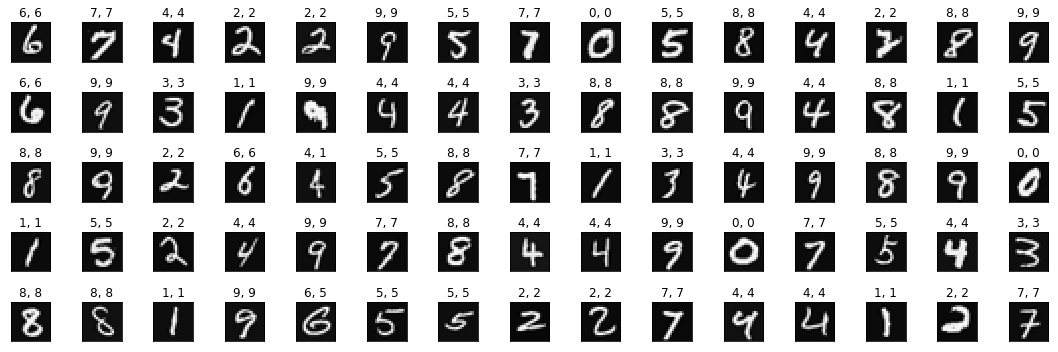

In [28]:
# いくつかの訓練データに対する手書き数字画像と正解数字，予測数字
n_im_row, n_im_col = 5, 15
n_im = n_im_row * n_im_col
d = np.random.choice(np.arange(m),n_im,replace=False)

n_px_row = np.floor(np.sqrt(n)).astype('int')
n_px_col = (n / n_px_row).astype('int')

fig = plt.figure(figsize=(n_im_col,n_im_row))
gs = gridspec.GridSpec(n_im_row,n_im_col)
k = 0
for i in np.arange(n_im_row):
    for j in np.arange(n_im_col):
        ax = plt.subplot(gs[i,j])
        ax.imshow(X[d[k],:].reshape(n_px_row,n_px_col,order='F'),cmap='gray')
        ax.set_title(str(yl[d[k],-1]) + ', ' + str(ypl[d[k],-1]))
        ax.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
        ax.tick_params(bottom=False,left=False,right=False,top=False)
        k = k + 1

plt.tight_layout()
plt.show()

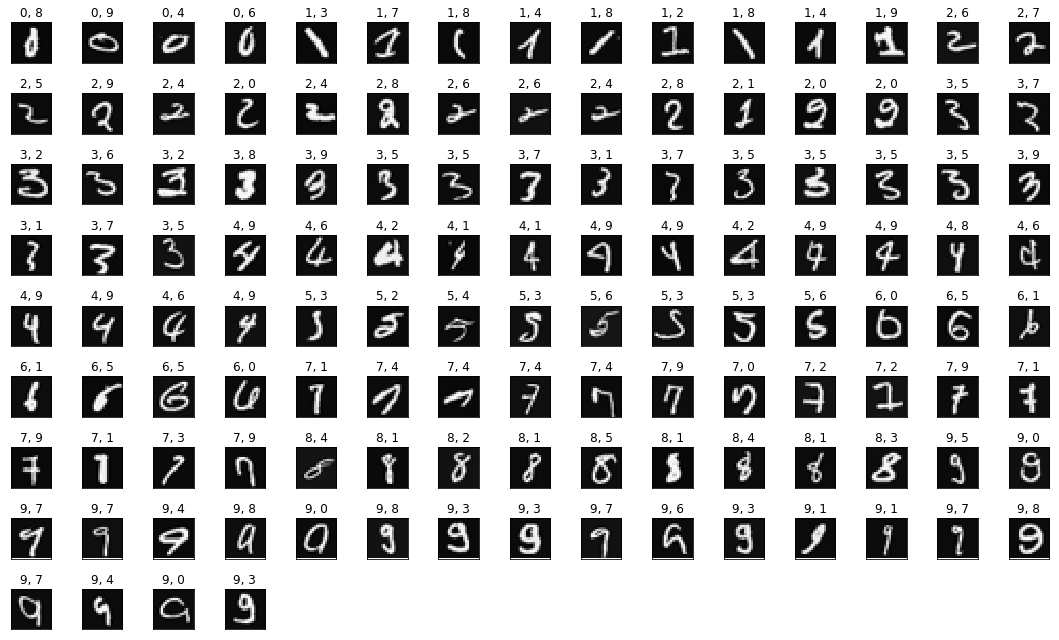

In [29]:
# 予測が外れたすべての訓練データに対する手書き数字画像と正解数字，予測数字
I_incorrect = (ypl != yl).flatten()
d = np.arange(m)[I_incorrect]
n_im = np.sum(I_incorrect)
n_im_col = 15
n_im_row = np.ceil(n_im/n_im_col).astype('int')

n_px_row = np.floor(np.sqrt(n)).astype('int')
n_px_col = (n / n_px_row).astype('int')

fig = plt.figure(figsize=(n_im_col,n_im_row))
gs = gridspec.GridSpec(n_im_row,n_im_col)
for k in np.arange(n_im):
    i, j = divmod(k,n_im_col)
    ax = plt.subplot(gs[i,j])
    ax.imshow(X[d[k],:].reshape(n_px_row,n_px_col,order='F'),cmap='gray')
    ax.set_title(str(yl[d[k],-1]) + ', ' + str(ypl[d[k],-1]))
    ax.tick_params(labelbottom=False,labelleft=False,labelright=False,labeltop=False)
    ax.tick_params(bottom=False,left=False,right=False,top=False)

plt.tight_layout()
plt.show()